# Machine Learning - Classification

## Will the project be completed?

This Jupyter notebook contains a classification test case where,
given some input data, we'll try to predict whether a project will completed or not.


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
# Data
data = pd.read_csv('../data/projects.csv')
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Features

As we can see by the data, we have the following features:
- **hours:** the amount of hours expected for the project
- **price:** the amount of money the buyer would pay

And we have the classification:
- **unfinished:** whether the project was left unfinished

For the 'unfinished' column, we have a binary representation:
- 1: left unfinished
- 0: finished

For the others, we have numeric values.

In [3]:
# Replace the 'unfinished' column with a 'finished' column
# First, create the 'finished' column 
data['finished'] = data.unfinished.map({0: 1, 1: 0})
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [4]:
# Then, drop the 'unfinished' column
data = data.drop(columns=['unfinished'])
data.tail()

,expected_hours,price,finished
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1
2156,37,377,0


### Data visualization
Let's use seaborn to visualize our data.

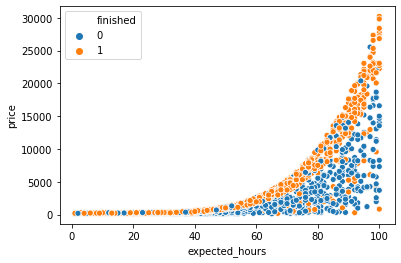

In [5]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

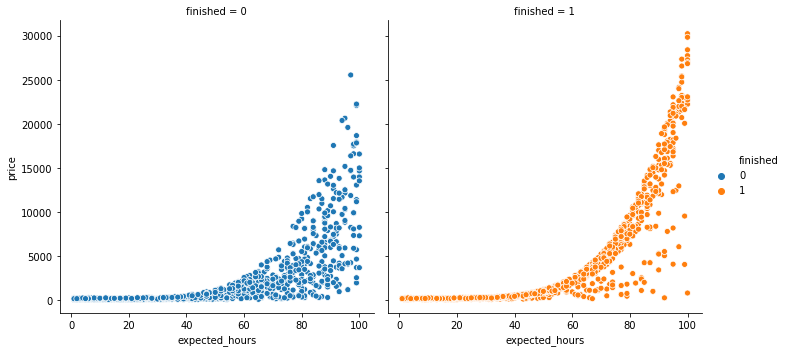

In [6]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)

In [7]:
# Getting the x
x = data[['expected_hours', 'price']]
x.head()

,expected_hours,price
0,26,192
1,88,9015
2,89,2577
3,42,275
4,39,170


In [8]:
# Getting the y
y = data['finished']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: finished, dtype: int64

In [9]:
# Shape of our data
data.shape

(2157, 3)

In [10]:
# We'll split our x and y into train and test dataframes
SEED = 20
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=SEED, stratify=y, test_size=0.25)
print("We'll be training with {} elements and testing with {} elements".format(len(train_x), len(test_x)))

We'll be training with 1617 elements and testing with 540 elements


In [11]:
train_y.value_counts()

1    850
0    767
Name: finished, dtype: int64

In [12]:
test_y.value_counts()

1    284
0    256
Name: finished, dtype: int64

### Model

In [13]:
model = LinearSVC(dual=False)
model.fit(train_x, train_y.values.ravel())

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Predictions

In [14]:
predictions = model.predict(test_x)
print(predictions)

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 

### Results
#### Accuracy score

In [15]:
accuracy = accuracy_score(test_y, predictions)
print("Accuracy score: %.2f" % (accuracy * 100))

Accuracy score: 54.44


#### Accuracy score for the Baseline algorithm

In [16]:
baseline_predictions = np.ones(540)
accuracy = accuracy_score(test_y, baseline_predictions)
print("Accuracy score for the baseline algorithm: %.2f" % (accuracy * 100))

Accuracy score for the baseline algorithm: 52.59


#### Decision boundary

In [17]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [18]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(x_axis, y_axis)
print(xx, '\n\n', yy)

[[ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 ...
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]] 

 [[  101.     101.     101.   ...   101.     101.     101.  ]
 [  377.37   377.37   377.37 ...   377.37   377.37   377.37]
 [  653.74   653.74   653.74 ...   653.74   653.74   653.74]
 ...
 [26908.89 26908.89 26908.89 ... 26908.89 26908.89 26908.89]
 [27185.26 27185.26 27185.26 ... 27185.26 27185.26 27185.26]
 [27461.63 27461.63 27461.63 ... 27461.63 27461.63 27461.63]]


In [19]:
dots = np.c_[xx.ravel(), yy.ravel()]
dots

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [20]:
Z = model.predict(dots)
Z = Z.reshape(xx.shape)
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

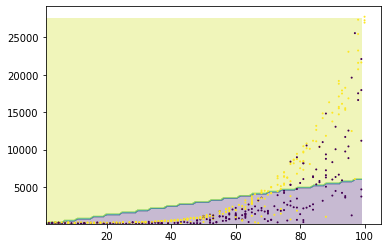

In [21]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)